In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sbn

In [105]:
dataFrame=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [106]:
dataFrame.head()  # ilk 5 veri

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


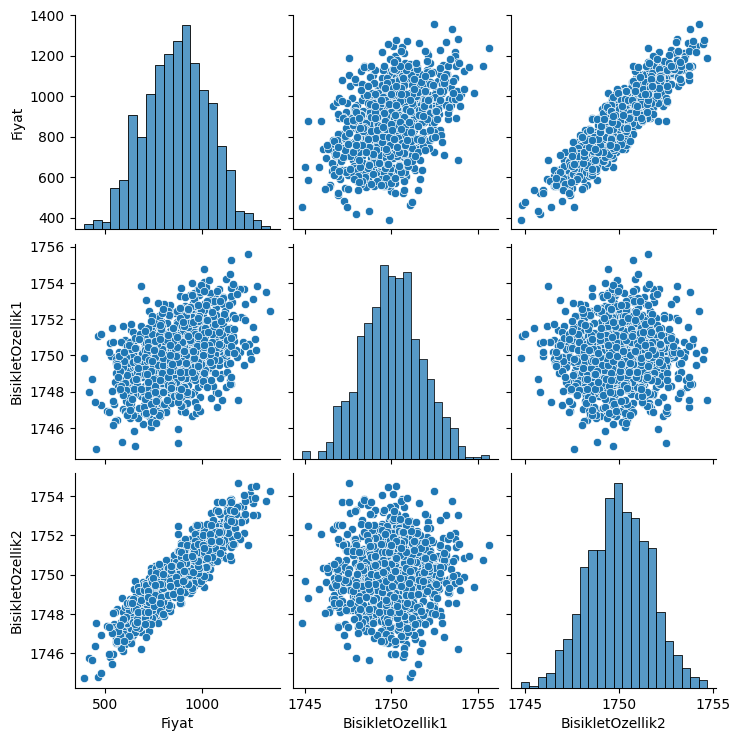

In [107]:
sbn.pairplot(dataFrame)

## TEST / TRAIN

In [108]:
from sklearn.model_selection import train_test_split # train ve test ayırma

In [109]:
# y = wx + b 
# y -> gitmek istenilen hedef , label
# x -> özellik (feature)

In [110]:
# test için verileri bir array'de tutmamız gerekir.
y = dataFrame["BisikletOzellik1"].values # dediğimizde numpy tipinde bir array oluşturulur

x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

# values demezsek pandas olur, dersek numpy olur


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [111]:
x_train.shape   # shape -> attribute, shape() -> method

(670, 2)

In [112]:
x_test.shape          # x -> 1000  test_size = 0.33 train = 670 , test = 330 şeklinde size göre bölündü

(330, 2)

In [113]:
# scaling -> nöronlara verilen veri setini küçük bir hale getirmek için
# işlemler daha kolay ve hızlı olması için
# list içerisindeki veriler oranlarına göre 0-1 arasında yuvarlanıyor.
# daha net sonuçlar almak için.

In [114]:
from sklearn.preprocessing import MinMaxScaler # preprocessing -> işlemeden önce yapılacaklar

In [115]:
scaler = MinMaxScaler()

In [116]:
scaler.fit(x_train)  # x_train = scaler.transform(x_train)

MinMaxScaler()

In [117]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [119]:
import tensorflow as tf

In [120]:
from tensorflow.keras.models import Sequential  # modelin sınıfı
from tensorflow.keras.layers import Dense       # katman

In [121]:
model = Sequential()

model.add(Dense(4,activation="relu"))  # hidden
model.add(Dense(4,activation="relu"))  # hidden
model.add(Dense(4,activation="relu"))  # hidden

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss="mse")

In [122]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - loss: 3062507.2500 
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 3062773.7500
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3062673.7500 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 3062621.7500
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 3061936.5000
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 3062399.7500
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 3061838.5000
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 3061786.7500
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 3061396.5000
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 3061294.7500
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 3060884.0000
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 3060097.2500
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 3059564.5000
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━

In [123]:
loss=model.history.history["loss"]
loss

[3062738.25,
 3062608.5,
 3062512.25,
 3062401.5,
 3062267.0,
 3062101.5,
 3061871.75,
 3061578.5,
 3061250.75,
 3060879.0,
 3060467.75,
 3060005.0,
 3059474.25,
 3058860.5,
 3058155.0,
 3057350.0,
 3056431.25,
 3055393.5,
 3054223.0,
 3052914.75,
 3051456.75,
 3049833.25,
 3048033.75,
 3046047.25,
 3043860.75,
 3041462.5,
 3038837.5,
 3035973.0,
 3032853.5,
 3029475.0,
 3025800.0,
 3021824.75,
 3017549.25,
 3012938.25,
 3007975.0,
 3002668.25,
 2996972.75,
 2990878.75,
 2984389.5,
 2977467.0,
 2970087.5,
 2962249.0,
 2953941.0,
 2945122.5,
 2935780.75,
 2925916.5,
 2915494.5,
 2904486.5,
 2892900.25,
 2880699.5,
 2867889.0,
 2854411.75,
 2840304.75,
 2825510.5,
 2809995.5,
 2793793.0,
 2776816.25,
 2759092.25,
 2740598.5,
 2721312.75,
 2701262.25,
 2680442.75,
 2658720.0,
 2636133.75,
 2612748.25,
 2588445.25,
 2563220.25,
 2537117.75,
 2510166.25,
 2482281.0,
 2453421.25,
 2423673.0,
 2392969.0,
 2361295.0,
 2328676.0,
 2295129.5,
 2260550.5,
 2225054.0,
 2188599.25,
 2151229.25,
 21

In [124]:
type(loss)

list

<Axes: >

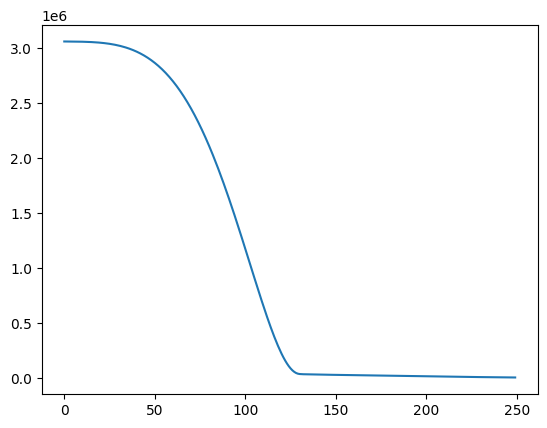

In [125]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [126]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)
trainLoss

8400.2109375

In [127]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

8719.9921875

In [128]:
testPredicts = model.predict(x_test)
testPredicts

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[1855.7688],
       [1606.8989],
       [1747.4102],
       [1739.247 ],
       [1739.1543],
       [1482.5999],
       [1771.2366],
       [1801.4904],
       [1793.315 ],
       [1820.301 ],
       [1678.5369],
       [1778.7349],
       [1771.3308],
       [1845.6716],
       [1893.3826],
       [1631.0935],
       [1869.1447],
       [1600.5071],
       [1882.0485],
       [1752.362 ],
       [1752.1235],
       [1667.3091],
       [1526.0303],
       [1579.9789],
       [1728.1434],
       [1869.6754],
       [1648.8293],
       [1671.959 ],
       [1732.8687],
       [1680.5776],
       [1499.5009],
       [1698.9949],
       [1659.2598],
       [1608.1256],
       [1745.4376],
       [1722.7095],
       [1835.1921],
       [1813.7063],
       [1730.6245],
       [1729.9629],
       [1679.4136],
       [1899.9801],
       [1866.3403],
       [1863.3262],
       [1757.4712],
       [1589.3171],
       [1874.8418],
       [1786.8936],
       [1827.0095],
       [1739.7566],


In [129]:
predictDataFrame = pd.DataFrame(y_test,columns=["Y Values"])
predictDataFrame

,Y Values
0,1751.019597
1,1749.850949
2,1750.837436
3,1748.122661
4,1747.681905
...,...
325,1751.318222
326,1748.351436
327,1750.798642
328,1752.061226


In [130]:
testPredicts = pd.Series(testPredicts.reshape(330,))
testPredicts

0      1855.768799
1      1606.898926
2      1747.410156
3      1739.246948
4      1739.154297
          ...     
325    1823.593140
326    1685.799805
327    1688.631348
328    1910.306641
329    1686.834961
Length: 330, dtype: float32

In [131]:
predictDataFrame = pd.concat([predictDataFrame,testPredicts],axis=1)
predictDataFrame

,Y Values,0
0,1751.019597,1855.768799
1,1749.850949,1606.898926
2,1750.837436,1747.410156
3,1748.122661,1739.246948
4,1747.681905,1739.154297
...,...,...
325,1751.318222,1823.593140
326,1748.351436,1685.799805
327,1750.798642,1688.631348
328,1752.061226,1910.306641


In [132]:
predictDataFrame.columns = ["Y Values","Predicted Y Values"]
predictDataFrame

,Y Values,Predicted Y Values
0,1751.019597,1855.768799
1,1749.850949,1606.898926
2,1750.837436,1747.410156
3,1748.122661,1739.246948
4,1747.681905,1739.154297
...,...,...
325,1751.318222,1823.593140
326,1748.351436,1685.799805
327,1750.798642,1688.631348
328,1752.061226,1910.306641


<Axes: xlabel='Y Values', ylabel='Predicted Y Values'>

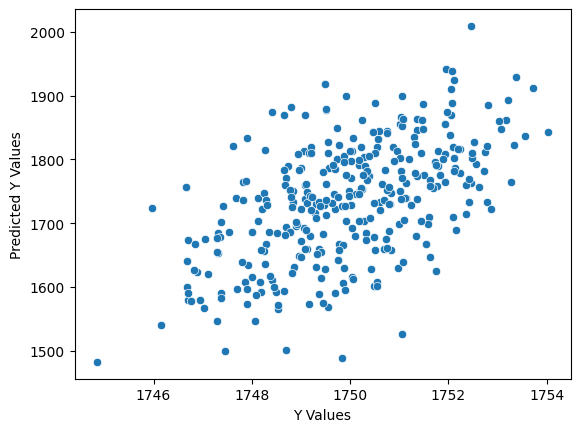

In [133]:
sbn.scatterplot(x="Y Values",y="Predicted Y Values",data=predictDataFrame)

In [134]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [135]:
mean_absolute_error(predictDataFrame["Y Values"],predictDataFrame["Predicted Y Values"])

74.46594689881628

In [136]:
mean_squared_error(predictDataFrame["Y Values"],predictDataFrame["Predicted Y Values"])

8719.992675095964

In [137]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038
